In [22]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')


xtrain = train_data.drop('label', axis=1)
xtest = test_data.drop('label', axis=1)

ytrain = train_data['label']
ytest =  test_data['label']

xtrain=np.array(xtrain)
xtest=np.array(xtest)

In [31]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4732)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               605824    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

In [33]:
batch_size = 512
epochs = 10

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 20s 114ms/step - loss: 2.3017 - accuracy: 0.1098
Epoch 2/10
118/118 [==============================] - 14s 120ms/step - loss: 2.3018 - accuracy: 0.1121
Epoch 3/10
118/118 [==============================] - 14s 116ms/step - loss: 2.3018 - accuracy: 0.1123
Epoch 4/10
118/118 [==============================] - 14s 115ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 5/10
118/118 [==============================] - 16s 137ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 6/10
118/118 [==============================] - 13s 110ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 7/10
118/118 [==============================] - 13s 107ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 8/10
118/118 [==============================] - 13s 107ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 9/10
118/118 [==============================] - 13s 107ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 10/10
118/118 [==============================] - 13s 108ms/step - l

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 3s 5ms/step - loss: 2.3010 - accuracy: 0.1135
Test Loss: 2.301025867462158, Test Accuracy: 0.11349999904632568


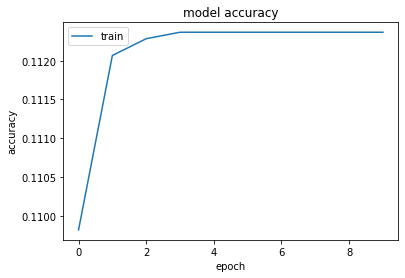

In [35]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

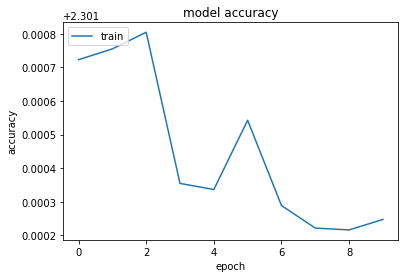

In [36]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()